# Idealized Rocket Flight
This notebook contains a solution of the idealized rocket flight equations from Curtis' Orbital Mechanics for Engineering Students, Chapter 11.

In [89]:
# numpy is a covenient library for fast numerical computation
import numpy as np
# scipy contains an ordinary differential equation (ODE) solver
from scipy.integrate import solve_ivp
# visualization library
import matplotlib.pyplot as plt

In [90]:
# define the set of differential equations for the ODE solver
# T ... thrust per unit mass [N/kg]
# A ... area of cross section for drag [m^2]
# CD ... drag coefficient 
# rho ... density of air [kg/m^3]
# g ... gravitational acceleration at sea level [N/kg]
# re ... radius of the Earth [m]
# m ... mass of the rocket [kg]

def idealrocket(t, z,  T, A, CD, rho, g, re, m):
    v, gamma, x, h = z
    dvdt = T/m - 0.5*rho*v**2/m -g*np.sin(gamma)
    dgammadt = -np.cos(gamma)/v * (g-v**2/(re+h))
    dxdt = re/(re+h)*v*np.cos(gamma)
    dhdt = v *np.sin(gamma)
    return [dvdt, dgammadt,dxdt,dhdt]

In [91]:
# solve the ODE / initial value problem for a set of parameter values
sol = solve_ivp(idealrocket, [0, 15], [1, np.deg2rad(60),0.1,0], args=(1000, 0.4, 1.17,1.27,9.81,6370000,10),
                dense_output=True)

In [92]:
# table the solution against time
t = np.linspace(0, 5, 300)
z = sol.sol(t)

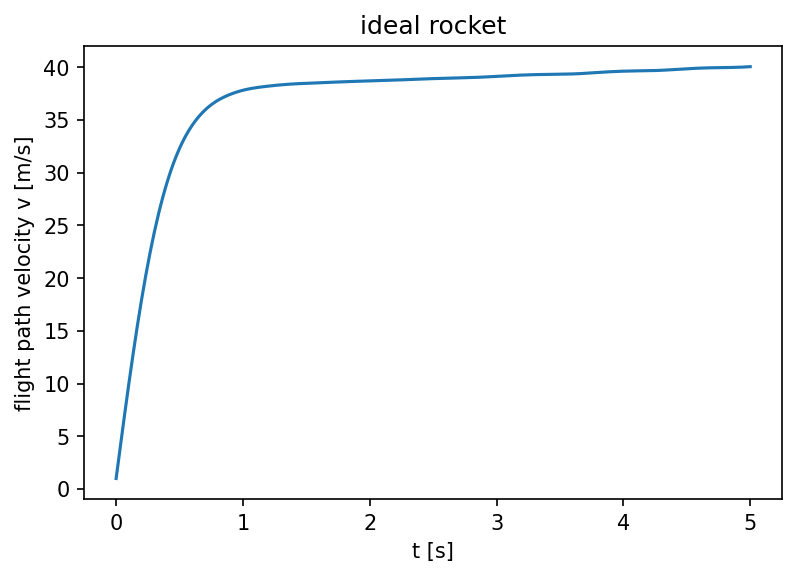

In [93]:
# plot the flight path velocity v
plt.figure(dpi=150)
plt.plot(t, z[0:1].T)
plt.xlabel('t [s]')
plt.ylabel('flight path velocity v [m/s]')
plt.title('ideal rocket')
plt.show()

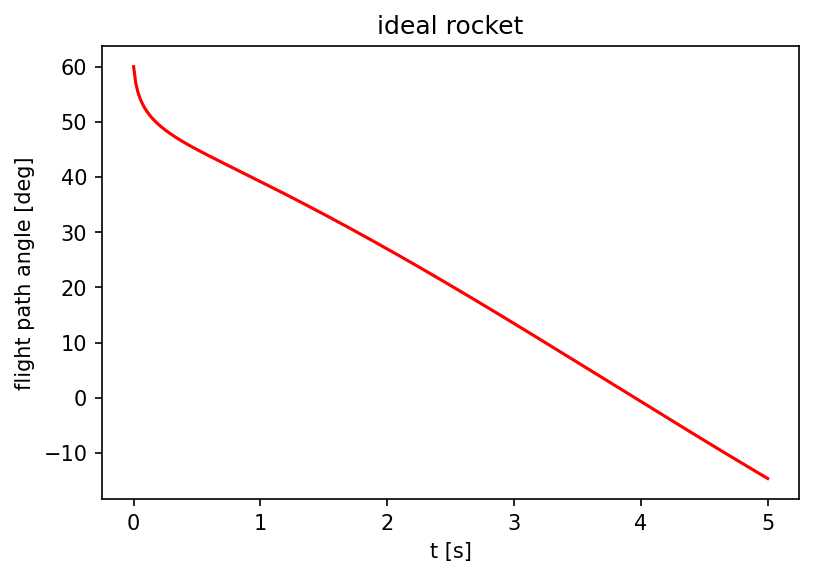

In [94]:
# plot the flight path angle gamma
plt.figure(dpi=150)
plt.plot(t, np.rad2deg(z[1:2].T), c='red')
plt.xlabel('t [s]')
plt.ylabel('flight path angle [deg]')
plt.title('ideal rocket')
plt.show()

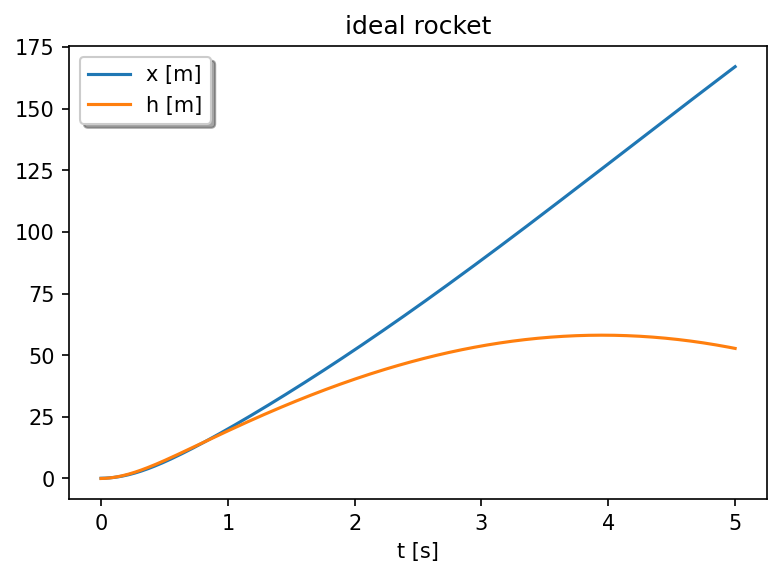

In [95]:
# plot the distance traveled (x) and the altitude above ground (h)
plt.figure(dpi=150)
plt.plot(t, z[2:4].T)
plt.xlabel('t [s]')
plt.legend(['x [m]', 'h [m]'], shadow=True)
plt.title('ideal rocket')
plt.show()